In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

In [72]:
df = pd.read_excel(r'F:\ML(intern)\Project2\Data_Train.xlsx')
df1 = pd.read_excel(r'F:\ML(intern)\Project2\Data_Test.xlsx')

# DATA EXPLORATION

## Printing No. of Rows and No. of Colulmns in Train and Test DataSets

In [73]:
print(df.shape)
print(df1.shape)

(6019, 13)
(1234, 12)


In [74]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [75]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


#### Categorical Columns: Owner_type,Fuel_type,transmission ,Name,loaction
#### Continuous Columns: Year,Kilometers_driven,MIleage,engine,power,price

## No. of Missing Values in Train and Test DataSets 

In [76]:
print(df.isna().sum())
print(df1.isna().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64


## Cleaning Text Data And Imputing Missing Values with median

In [77]:
df = df.drop(columns = ['New_Price'] )
df1 = df1.drop(columns = ['New_Price'])

In [78]:
le = preprocessing.LabelEncoder()
iteration={'Fuel_Type','Location','Transmission','Owner_Type'}
for i in iteration: 
    df[i] = le.fit_transform(df[i])

In [79]:
le1 = preprocessing.LabelEncoder()
iteration={'Fuel_Type','Location','Transmission','Owner_Type'}
for i in iteration: 
    df1[i] = le1.fit_transform(df1[i])

In [80]:
x=df['Name']
a=[]
for k in range(len(x)):
    a=list(x[k].split(' ',2))
    df.loc[k,'Brand']=a[0]
    df.loc[k,'Model']=a[1]
    df.loc[k,'Version']=str(a[2])
df = df.drop(columns = ['Name'])
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


In [81]:
x=df1['Name']
a=[]
for k in range(len(x)):
    a=list(x[k].split(' ',2))
    df1.loc[k,'Brand']=a[0]
    if len(a)==3:
        df1.loc[k,'Model']=a[1]
    df1.loc[k,'Version']=a[len(a)-1]
df1 = df1.drop(columns = ['Name'])
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,4,2014,40929,0,1,0,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto,K10 LXI CNG
1,3,2013,54493,3,1,2,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,800 2016-2019 LXI
2,9,2017,34000,1,1,0,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,Crysta Touring Sport 2.4 MT
3,5,2012,139000,1,1,0,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,Liva GD
4,9,2014,29000,3,1,0,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,Magna


In [82]:
iteration2={'Mileage','Engine','Power'}
for i in iteration2:
    new=df[i].str.split(" ",expand=True)
    new1=df1[i].str.split(" ",expand=True)
    df1[i]=pd.to_numeric(new1[0],errors='coercive')
    df[i]=pd.to_numeric(new[0],errors='coercive')
    df[i].fillna(df[i].astype("float64").median(),inplace=True)
    df1[i].fillna(df1[i].astype("float64").median(),inplace=True)
df['Seats'].fillna(df['Seats'].astype("float64").median(),inplace=True)
df1['Seats'].fillna(df1['Seats'].astype("float64").median() , inplace = True)

In [83]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


####                           no missing values

In [84]:
print("\t          train_data")
print(df.isna().sum())
print(" \t        test_data")
print(df1.isna().sum())

	          train_data
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
Version              0
dtype: int64
 	        test_data
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
Model                1
Version              0
dtype: int64


## Outlier Detection

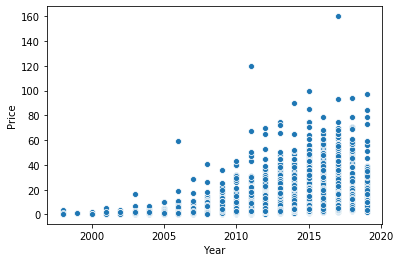

In [85]:
ax=sns.scatterplot(x="Year", y="Price", data=df)

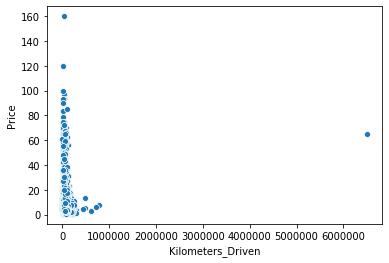

In [86]:
ax=sns.scatterplot(x="Kilometers_Driven", y="Price", data=df)

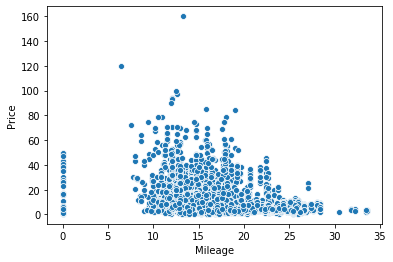

In [87]:
ax=sns.scatterplot(x="Mileage", y="Price", data=df)

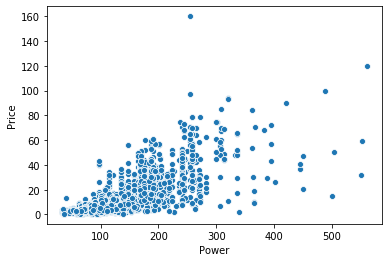

In [88]:
ax=sns.scatterplot(x="Power", y="Price", data=df)

##  Relation between features of given dataset 

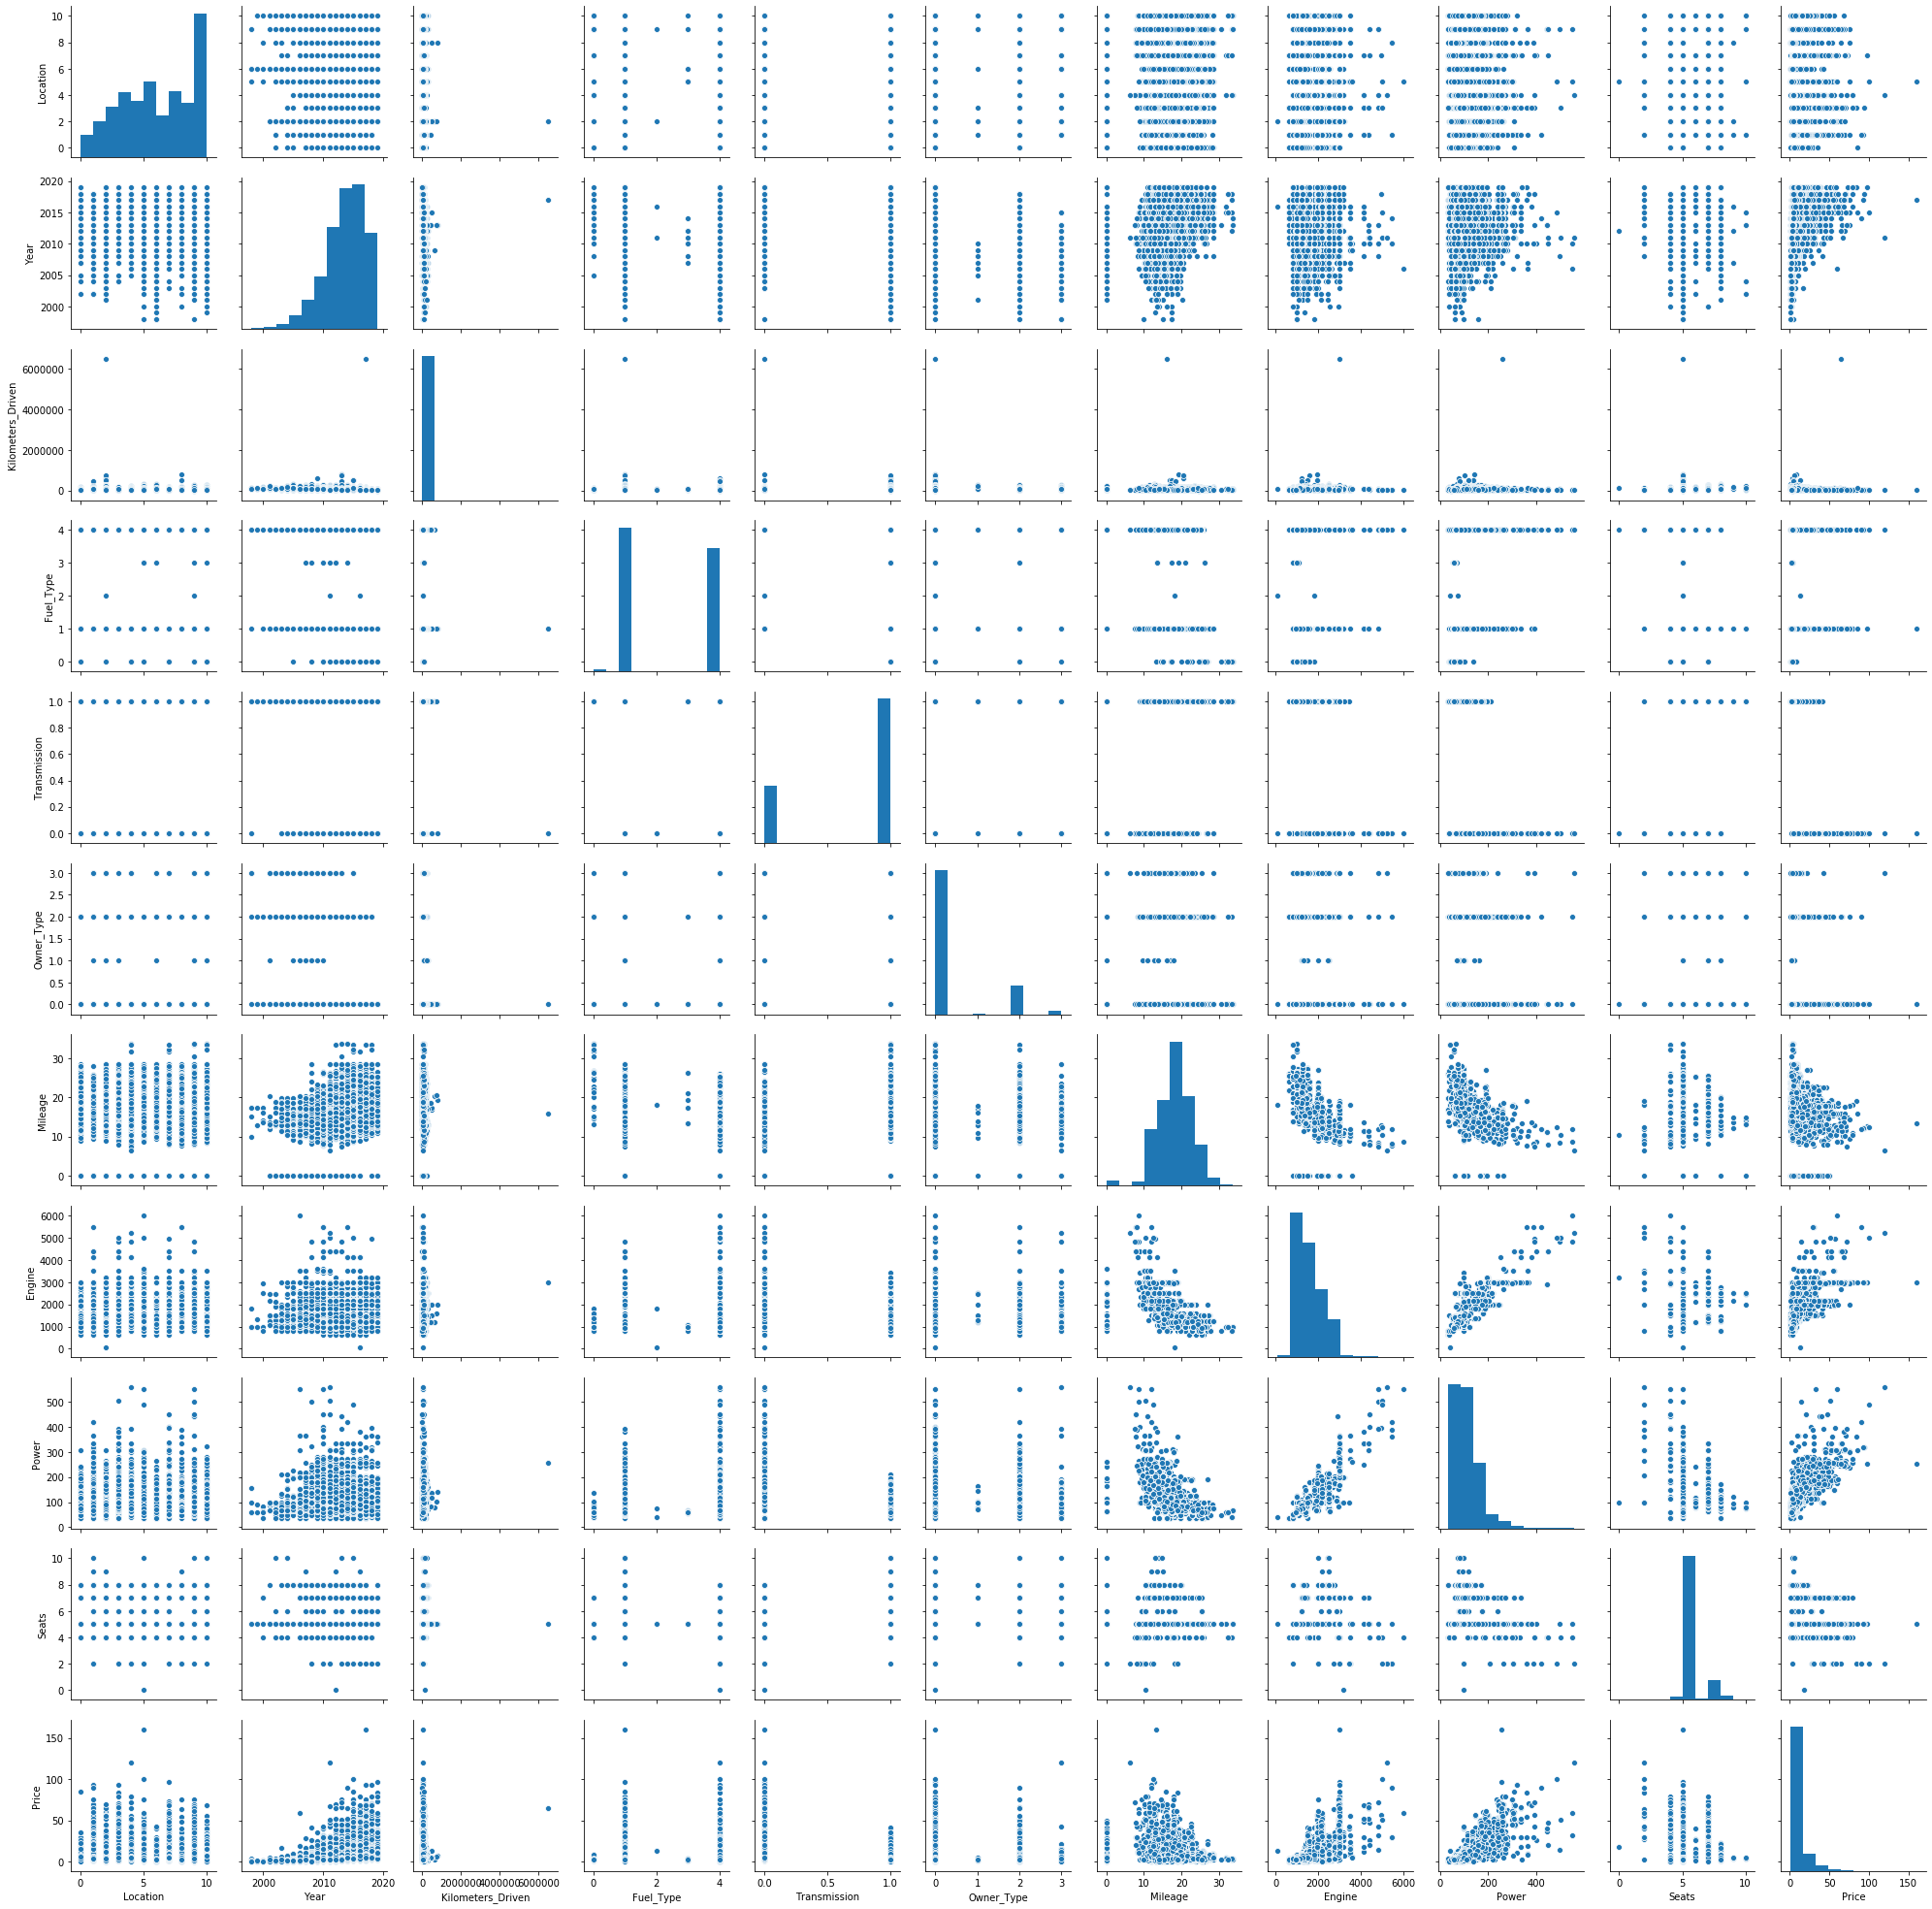

In [89]:
col = df.columns
sns.pairplot( df[col]  ,height = 2.5)

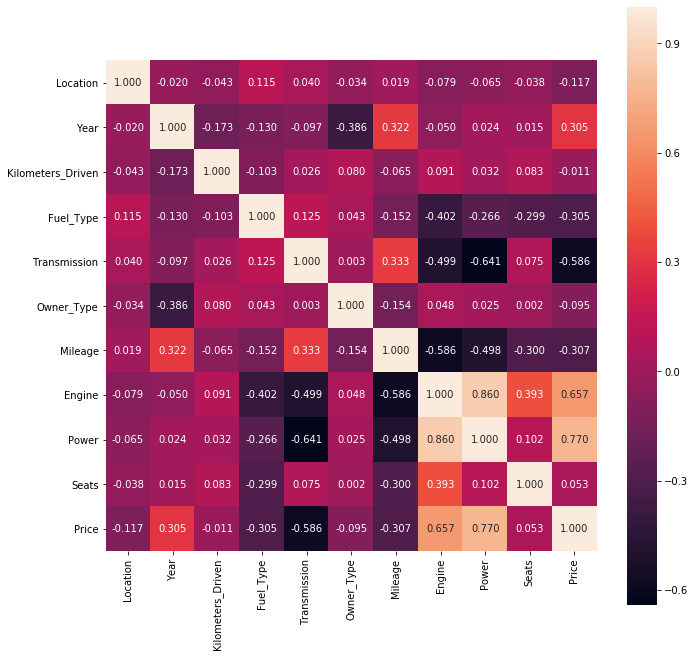

In [90]:
plt.subplots(figsize = (11,11))
corrmatrix = df.corr()
sns.heatmap(corrmatrix ,square = True,annot = True , fmt = '.3f')

In [91]:
corrmatrix

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Location,1.000000,-0.020117,-0.042751,0.115048,0.040174,-0.033889,0.018773,-0.078600,-0.065482,-0.037607,-0.116620
Year,-0.020117,1.000000,-0.173048,-0.129526,-0.097059,-0.386160,0.321534,-0.050086,0.024195,0.015204,0.305327
Kilometers_Driven,-0.042751,-0.173048,1.000000,-0.102953,0.025663,0.079924,-0.065253,0.090890,0.032080,0.082782,-0.011493
Fuel_Type,0.115048,-0.129526,-0.102953,1.000000,0.125219,0.043017,-0.152125,-0.401784,-0.265898,-0.299306,-0.305207
Transmission,0.040174,-0.097059,0.025663,0.125219,1.000000,0.003002,0.333094,-0.499194,-0.640873,0.074838,-0.586025
Owner_Type,-0.033889,-0.386160,0.079924,0.043017,0.003002,1.000000,-0.154188,0.047847,0.024566,0.002219,-0.094559
Mileage,0.018773,0.321534,-0.065253,-0.152125,0.333094,-0.154188,1.000000,-0.586404,-0.497666,-0.299632,-0.306588
Engine,-0.078600,-0.050086,0.090890,-0.401784,-0.499194,0.047847,-0.586404,1.000000,0.860410,0.393368,0.657347
Power,-0.065482,0.024195,0.032080,-0.265898,-0.640873,0.024566,-0.497666,0.860410,1.000000,0.102470,0.769711
Seats,-0.037607,0.015204,0.082782,-0.299306,0.074838,0.002219,-0.299632,0.393368,0.102470,1.000000,0.052811


# Data Cleaning And Preprocessing

## Label Encoding

In [92]:
df1['Model']=df1['Model'].fillna(method='ffill')

In [93]:
le = preprocessing.LabelEncoder()
iteration={'Brand','Model','Version'}
for i in iteration: 
    df[i] = le.fit_transform(df[i])

In [94]:
le = preprocessing.LabelEncoder()
iteration={'Brand','Model','Version'}
for i in iteration: 
    df1[i] = le.fit_transform(df1[i])
    

In [100]:
original_df = df
original_df.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,18,189,1216
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,10,53,223


## Normalization

In [101]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns=['Location','Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Brand', 'Model','Version']
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,0.9,0.571429,0.011051,0.00,1.0,0.000000,0.793083,0.156261,0.045569,0.5,0.008210,0.600000,0.895735,0.700058
1,1.0,0.809524,0.006282,0.25,1.0,0.000000,0.586464,0.254809,0.174971,0.5,0.075583,0.333333,0.251185,0.128382
2,0.2,0.619048,0.007051,1.00,1.0,0.000000,0.542636,0.190179,0.103652,0.5,0.025445,0.300000,0.469194,0.835924
3,0.2,0.666667,0.013359,0.25,1.0,0.000000,0.619261,0.198448,0.103766,0.7,0.034846,0.600000,0.327014,0.850892
4,0.3,0.714286,0.006231,0.25,0.0,0.666667,0.453190,0.319946,0.202739,0.5,0.108423,0.033333,0.047393,0.668969


## Clipping Outliers

## using the z- score

In [102]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df.head()
np.max(df)
z

array([[1.14365818, 1.02713851, 0.14531489, ..., 0.33132605, 1.2290421 ,
        0.58198804],
       [1.48198899, 0.50216112, 0.19436922, ..., 0.66226004, 0.84698996,
        1.36909725],
       [1.22465746, 0.72127858, 0.13958146, ..., 0.7864583 , 0.14480264,
        1.04569008],
       ...,
       [0.12866576, 0.41541866, 0.0409635 , ..., 0.20712779, 1.45801622,
        0.12928374],
       [0.80532737, 0.10955873, 0.13958146, ..., 0.33132605, 1.2290421 ,
        0.59574191],
       [0.20966505, 0.72127858, 0.12862391, ..., 1.4074496 , 1.25914338,
        0.08016276]])

In [103]:
threshold = 3
df = df[(z < 3).all(axis=1)]
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Version
0,0.9,0.571429,0.011051,0.00,1.0,0.000000,0.793083,0.156261,0.045569,0.5,0.008210,0.600000,0.895735,0.700058
1,1.0,0.809524,0.006282,0.25,1.0,0.000000,0.586464,0.254809,0.174971,0.5,0.075583,0.333333,0.251185,0.128382
2,0.2,0.619048,0.007051,1.00,1.0,0.000000,0.542636,0.190179,0.103652,0.5,0.025445,0.300000,0.469194,0.835924
3,0.2,0.666667,0.013359,0.25,1.0,0.000000,0.619261,0.198448,0.103766,0.7,0.034846,0.600000,0.327014,0.850892
4,0.3,0.714286,0.006231,0.25,0.0,0.666667,0.453190,0.319946,0.202739,0.5,0.108423,0.033333,0.047393,0.668969


In [104]:
df.size

76776

# Idntifying Correlation Between Input and Output Variables using Chi-SquareTest

In [105]:
x=['Year','Location','Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Brand', 'Model','Version']

In [106]:
l=[]
from scipy import stats
for i in x:
    statistic,p,dof,freq=stats.chi2_contingency(pd.crosstab(df[i],df['Price']))
    prob=0.90
    alpha=1-prob
    critical=stats.chi2.ppf(prob,dof)
    if abs(statistic)>=critical:
        l.append(i)
        print(i,":dependant")
    else:
        print(i,":independant")
    if p<=alpha:
        print(i,":dependant")
    else:
        print(i,":independent")   
l

Year :dependant
Year :dependant
Location :dependant
Location :dependant
Kilometers_Driven :dependant
Kilometers_Driven :dependant
Fuel_Type :independant
Fuel_Type :independent
Transmission :dependant
Transmission :dependant
Owner_Type :independant
Owner_Type :independent
Mileage :dependant
Mileage :dependant
Engine :dependant
Engine :dependant
Power :dependant
Power :dependant
Seats :dependant
Seats :dependant
Brand :dependant
Brand :dependant
Model :dependant
Model :dependant
Version :dependant
Version :dependant


['Year',
 'Location',
 'Kilometers_Driven',
 'Transmission',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Brand',
 'Model',
 'Version']

The Features which are dependant only taken for training the model

In [107]:
prc=original_df['Price']
original_df=original_df.drop(columns=['Price'])

In [110]:
#df1=df1.drop(columns=['Fuel_Type','Owner_Type'])

In [113]:
#original_df=pd.concat([original_df,prc],axis=1)

In [114]:
original_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version,Price,Price
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,18,189,1216,1.75,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,10,53,223,12.50,12.50
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,9,99,1452,4.50,4.50
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,18,69,1478,6.00,6.00
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,1,10,1162,17.74,17.74


In [115]:
original_df.size

90285

In [116]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Version
0,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0,16,15,459
1,3,2013,54493,3,1,2,24.70,796.0,47.30,5.0,16,15,260
2,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0,26,77,360
3,5,2012,139000,1,1,0,23.59,1364.0,93.70,5.0,26,59,484
4,9,2014,29000,3,1,0,18.50,1197.0,82.85,5.0,9,158,494


# Train Test Split

In [117]:
x_test=df1

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(original_df.iloc[:, :-1], 
                                                    original_df.iloc[:, -1], 
                                                    test_size = 0.3,
                                                    random_state = 42)

# Training The Model

## Linear Regression 

In [119]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)
y_train_pred=linearRegression.predict(X_train)
y_pred = linearRegression.predict(X_test)
y_test_pred=linearRegression.predict(x_test)

ValueError: shapes (1234,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)

### R2-Score on Train Data

In [120]:
r2score=r2_score(Y_train,y_train_pred)
print("R2-Score:",r2score)

R2-Score: 1.0


### R2-Score on Test Data

In [57]:
r2score=r2_score(Y_test, y_pred)
print("R2-Score:",r2score)

R2-Score: 0.7307849859722834


### Errors Obtained After predicting on Train Data 

In [58]:
mae=metrics.mean_absolute_error(Y_train,y_train_pred)
mse=metrics.mean_squared_error(Y_train,y_train_pred)
rms=math.sqrt(mse)
print("Mean Absolute Error:",mae,"\nMean Squared Error:",mse,"\nRoot Mean Squared Error:",rms)

Mean Absolute Error: 0.016854404687321245 
Mean Squared Error: 0.0006187556342441469 
Root Mean Squared Error: 0.024874799179976245


### Errors Obtained After predicting on Test Data 

In [59]:
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
rms=math.sqrt(mse)
print("Mean Absolute Error:",mae,"\nMean Squared Error:",mse,"\nRoot Mean Squared Error:",rms)

Mean Absolute Error: 0.0174781371110873 
Mean Squared Error: 0.0006763215581120938 
Root Mean Squared Error: 0.026006183074647724


## Random Forest 

In [60]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, Y_train)
y_train_pred=rf.predict(X_train)
y_pred = rf.predict(X_test)

### R2-Score on Train Data 

In [61]:
r2score=r2_score(Y_train, y_train_pred)
print("R2-Score:",r2score)

R2-Score: 0.9873953861698708


### R2-Score on Test Data

In [62]:
r2score=r2_score(Y_test, y_pred)
print("R2-Score:",r2score)

R2-Score: 0.9196549831071212


### Errors Obtained After predicting on Train Data 

In [63]:
mae=metrics.mean_absolute_error(Y_train, y_train_pred)
mse=metrics.mean_squared_error(Y_train, y_train_pred)
rms=math.sqrt(mse)
print("Mean Absolute Error:",mae,"\nMean Squared Error:",mse,"\nRoot Mean Squared Error:",rms)

Mean Absolute Error: 0.0027992615053067755 
Mean Squared Error: 2.9247556592421065e-05 
Root Mean Squared Error: 0.005408101015367693


### Errors Obtained After predicting on Test Data 

In [64]:
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
rms=math.sqrt(mse)
print("Mean Absolute Error:",mae,"\nMean Squared Error:",mse,"\nRoot Mean Squared Error:",rms)

Mean Absolute Error: 0.007601609766477247 
Mean Squared Error: 0.000201842632023264 
Root Mean Squared Error: 0.014207133138788557


## Predicting on Original Test Set Using RandomForest Model

In [65]:
output = rf.predict(x_test)

In [49]:
output

array([0.14208542, 0.14208542, 0.14208542, ..., 0.14208542, 0.14583135,
       0.14583135])